# WITH PANDAS AND MATPLOTLIB

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS

1. Number of people by gender
1. Kill weapon
1. Age of killed people
1. Race of killed people
1. Killed People According to Races (Pie Chart)
1. Most common 15 Name or Surname of killed people

<br>

read data

if didn't work you can use this parameters: encoding="windows-1252"

In [3]:
df = pd.read_csv("PoliceKillingsUs.csv")
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.0,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True


## 1: Plot number of people by gender

In [5]:
df.groupby("gender").head()


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
8,16,Autumn Steele,06/01/15,shot,unarmed,34.0,F,W,Burlington,IA,False,other,Not fleeing,True
51,100,Kristiana Coignard,22/01/15,shot and Tasered,knife,17.0,F,W,Longview,TX,True,other,Not fleeing,False
60,20,Jessie Hernandez,26/01/15,shot,vehicle,17.0,F,H,Denver,CO,False,other,Not fleeing,False
67,111,Tiffany Terry,27/01/15,shot,knife,39.0,F,W,Omaha,NE,True,attack,Not fleeing,False
80,118,Yuvette Henderson,03/02/15,shot,gun,38.0,F,B,Emeryville,CA,False,attack,Car,False


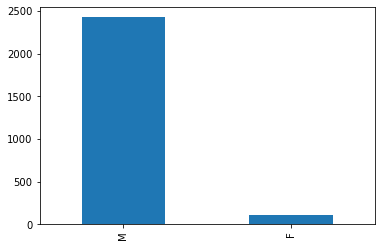

In [6]:
# with pandas

df.gender.value_counts().plot(kind="bar");




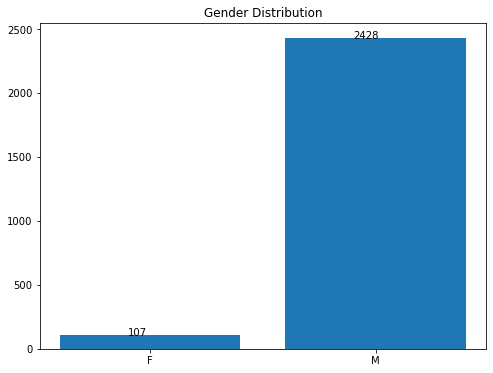

In [7]:
# with matplotlib

fig = plt.subplots(figsize =(8, 6))
bar1 = plt.bar(["F","M"], df.groupby("gender")["gender"].value_counts(ascending = False))
plt.title("Gender Distribution")
for bar in bar1:
    yval = bar.get_height()
    plt.text(bar.get_x() + .3, yval + 1, yval)
    bar.get_height()


## 2: Plot 7 most common kill weapons

In [8]:
common_wep = df.armed.value_counts().head(7)
common_wep

gun             1398
knife            373
vehicle          177
unarmed          171
undetermined     117
toy weapon       104
machete           18
Name: armed, dtype: int64

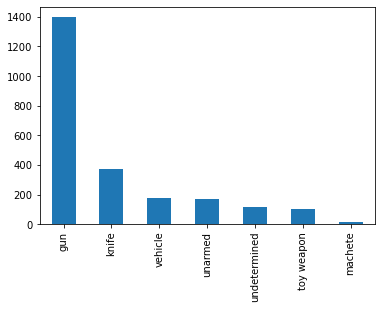

In [12]:
# with pandas
common_wep.plot(kind = "bar");

,index,armed
0,gun,1398
1,knife,373
2,vehicle,177
3,unarmed,171
4,undetermined,117
5,toy weapon,104
6,machete,18


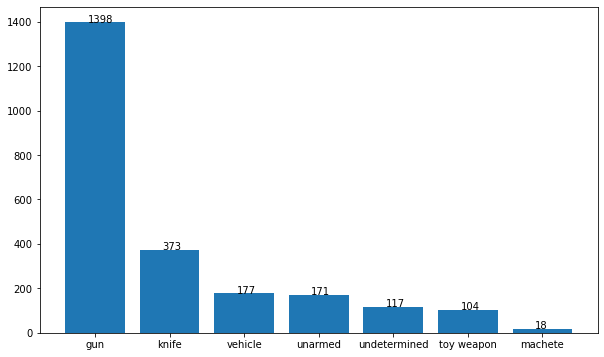

In [9]:
# with matplotlib
common_wep2 = common_wep.reset_index()
fig = plt.figure(figsize=(10,6))
bar2 = plt.bar([i for i in common_wep2["index"]], common_wep)
for bar in bar2:
    yval = bar.get_height()
    plt.text(bar.get_x() + .3, yval + 1, yval)
    bar.get_height()
common_wep2

## 3: Plot number of age of killed people under two groups : Under 25 and Above 25

In [14]:

df2  = df
df2["under25"] = df["age"]<25
df2.under25
df2["above25"] = df["age"]>25


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [17]:
df2.above25.value_counts()

True     1905
False     630
Name: above25, dtype: int64

[Text(0, 0, 'above25'), Text(1, 0, 'below25')]

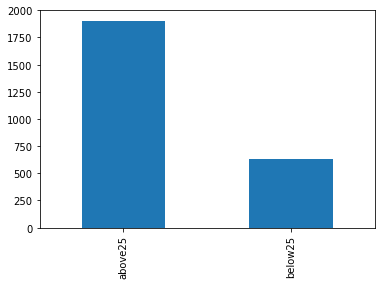

In [18]:
# with pandas
bar4 = df2.above25.value_counts().plot(kind = "bar")
bar4.set_xticklabels(["above25","below25"])


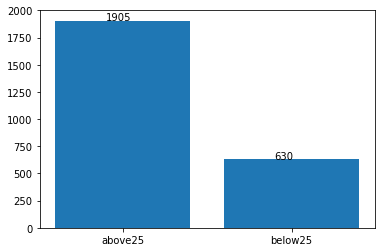

In [19]:
# with matplotlib
bar5 = plt.bar(["above25","below25"],df2.above25.value_counts())
for bar in bar5:
    yval = bar.get_height()
    plt.text(bar.get_x() + .3, yval + 1, yval)
    bar.get_height()


## 4: Plot number of killed poeple by race

In [26]:
df.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [46]:
df.race.dropna().value_counts()


W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

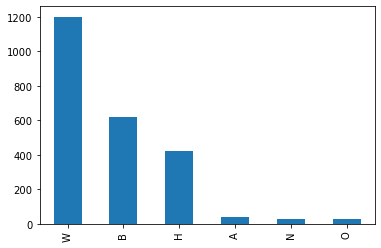

In [23]:
# with pandas
df.race.value_counts().plot(kind="bar");



0    W
1    B
2    H
3    A
4    N
5    O
Name: index, dtype: object

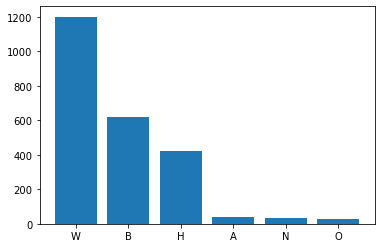

In [47]:
# with matplotlib

df3 = df.race.dropna().value_counts().reset_index()
plt.bar(df3["index"], df.race.value_counts())
df3["index"]


## 5: Killed People According to Races (Pie Chart)

In [48]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,under25,above25
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,False,True
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,False,True
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,True,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,False,True
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,False,True


In [55]:
df.race.unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [57]:
df.race.value_counts(dropna=False)

W      1201
B       618
H       423
NaN     195
A        39
N        31
O        28
Name: race, dtype: int64

Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

In [60]:
df4 = df.dropna()
df4.shape

(2254, 16)

In [61]:
df4

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,under25,above25
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,False,True
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,False,True
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,True,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,False,True
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2519,2805,Aries Clark,25/07/17,shot,undetermined,16.0,M,B,Marion,AR,False,undetermined,Not fleeing,False,True,False
2523,2808,Kesharn K. Burney,26/07/17,shot,vehicle,25.0,M,B,Dayton,OH,False,attack,Car,False,False,False
2525,2820,Deltra Henderson,27/07/17,shot,gun,39.0,M,B,Homer,LA,False,attack,Car,False,False,True
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True,False,True


(2254, 15)

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart (You can use Matplotlib)**

In [62]:
df4.race.value_counts()

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

In [63]:
df4.race.unique()

array(['A', 'W', 'H', 'B', 'O', 'N'], dtype=object)

In [65]:
df4.race.value_counts().unique()

array([1168,  592,  401,   36,   29,   28])

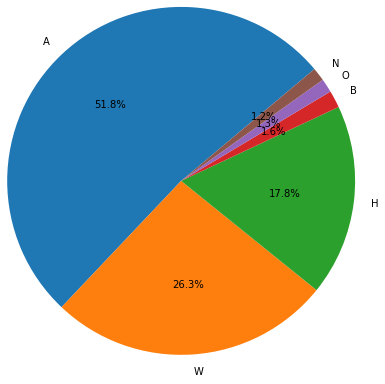

In [72]:
# matplotlib

plt.pie(df4.race.value_counts(),radius=2, labels= df4.race.unique(), autopct='%1.1f%%',startangle = 40 );



## 6: Most common 15 Name or Surname of killed people 

In [73]:
df4.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,under25,above25
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,False,True
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,False,True
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,True,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,False,True
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,False,True


In [74]:
df4.shape

(2254, 16)

In [75]:
df4.name.value_counts()

Daquan Antonio Westbrook    2
Michael Johnson             2
Michael Brown               2
Eric Harris                 2
Brandon Jones               2
                           ..
Jeremy J. Sinclair          1
Mark Guirguis               1
Michael Joseph Harris       1
Andrew Toto                 1
Jamison  Childress          1
Name: name, Length: 2249, dtype: int64

In [92]:
# Problem: TK TK is most probably not a name or surname. We will clean them.

df4 = df4[~df4.name.str.contains("TK")]

pairs = df4.name.str.split(" ")
pairs.head()


0             [Tim, Elliot]
1      [Lewis, Lee, Lembke]
2    [John, Paul, Quintero]
3        [Matthew, Hoffman]
4      [Michael, Rodriguez]
Name: name, dtype: object

In [93]:
type(pairs)


pandas.core.series.Series

**INSTRUCTION : Plot Most common 15 Name OR Surname of killed people** 

shape

In [94]:
pairs.shape

(2253,)

In [95]:
pairs[0]

['Tim', 'Elliot']

In [96]:
pairs[0][0]

'Tim'

In [98]:
pairs.size

2253

In [107]:

count = 0
for i in pairs:
  count = count+len(i)
count

5381

In [111]:
names = [i[0] for i in pairs]
names


['Tim',
 'Lewis',
 'John',
 'Matthew',
 'Michael',
 'Kenneth',
 'Kenneth',
 'Brock',
 'Autumn',
 'Leslie',
 'Patrick',
 'Ron',
 'Hashim',
 'Nicholas',
 'Omarr',
 'Loren',
 'James',
 'Artago',
 'Thomas',
 'Jimmy',
 'Andy',
 'Tommy',
 'Brian',
 'Salvador',
 'John',
 'Richard',
 'Marcus',
 'Michael',
 'Mario',
 'Talbot',
 'Robert',
 'Jeffrey',
 'Donte',
 'Kavonda',
 'Quincy',
 'Jose',
 'Nathan',
 'Scott',
 'Zaki',
 'Terence',
 'Pablo',
 'Daniel',
 'Jonathan',
 'Carter',
 'Paul',
 'Dewayne',
 'Todd',
 'Miguel',
 'Isaac',
 'Andrew',
 'Tiano',
 'Kristiana',
 'Robert',
 'Demaris',
 'Jose',
 'Wendell',
 'Daryl',
 'Darin',
 'Orlando',
 'Jessie',
 'Raymond',
 'Joshua',
 'David',
 'Nicolas',
 'Chris',
 'Jermonte',
 'Tiffany',
 'Alan',
 'Matautu',
 'Cody',
 'Ralph',
 'Alan',
 'John',
 'Victor',
 'Edward',
 'Jacob',
 'David',
 'Francis',
 'Ledarius',
 'Yuvette',
 'Dewayne',
 'Anthony',
 'Jeremy',
 'Izzy',
 'Salvador',
 'Joaquin',
 'Jimmy',
 'Markell',
 'Paul',
 'Herbert',
 'John',
 'James',
 'John'

In [112]:
surnames = [i[1] for i in pairs]

In [115]:
countnames = {}
for name in names:
    for name in surnames:
        countnames[name] += 1
    
        else:
            countnames[name] = 0

countnames

{'Elliot': 2253,
 'Lee': 74349,
 'Paul': 13518,
 'Hoffman': 4506,
 'Rodriguez': 13518,
 'Joe': 9012,
 'Arnold': 4506,
 'Nichols': 6759,
 'Steele': 2253,
 'Sapp': 4506,
 'Wetter': 2253,
 'Sneed': 2253,
 'Hanif': 2253,
 'Ryan': 11265,
 'Julian': 4506,
 'Simpson': 6759,
 'Dudley': 2253,
 'Damon': 6759,
 'Hamby': 2253,
 'Foreman': 2253,
 'Martinez': 15771,
 'Smith': 42807,
 '': 72096,
 'Figueroa': 4506,
 'Edward': 20277,
 'McClendon': 4506,
 'Golden': 2253,
 'Goebel': 2253,
 'Jordan': 2253,
 'Schroeder': 2253,
 'Edwards': 9012,
 'R.': 22530,
 'Sowell': 4506,
 'Earl': 6759,
 'Reed': 4506,
 'Ceja': 2253,
 'Massey': 2253,
 'Hall': 15771,
 'Shinwary': 2253,
 'Walker': 4506,
 'Meza': 2253,
 'Brumley': 2253,
 'Guillory': 2253,
 'Castle': 2253,
 'Campbell': 4506,
 'Carr': 4506,
 'Allen': 36048,
 'Angel': 18024,
 'Holmes': 4506,
 'Toto': 2253,
 'Meton': 2253,
 'Coignard': 2253,
 'Francis': 11265,
 'Turner': 4506,
 'Antonio': 13518,
 'King': 9012,
 'Myler': 2253,
 'Hutchins': 2253,
 'Jude': 2253,
 

[('Michael', 82),
 ('David', 53),
 ('James', 47),
 ('Robert', 44),
 ('Joseph', 43),
 ('Daniel', 40),
 ('William', 40),
 ('Lee', 37),
 ('John', 36),
 ('Christopher', 35),
 ('Richard', 33),
 ('Smith', 31),
 ('J.', 30),
 ('Johnson', 29),
 ('Joshua', 27)]

,name_or_surname_most_frequency,frequency
0,Michael,82
1,David,53
2,James,47
3,Robert,44
4,Joseph,43
5,Daniel,40
6,William,40
7,Lee,37
8,John,36
9,Christopher,35


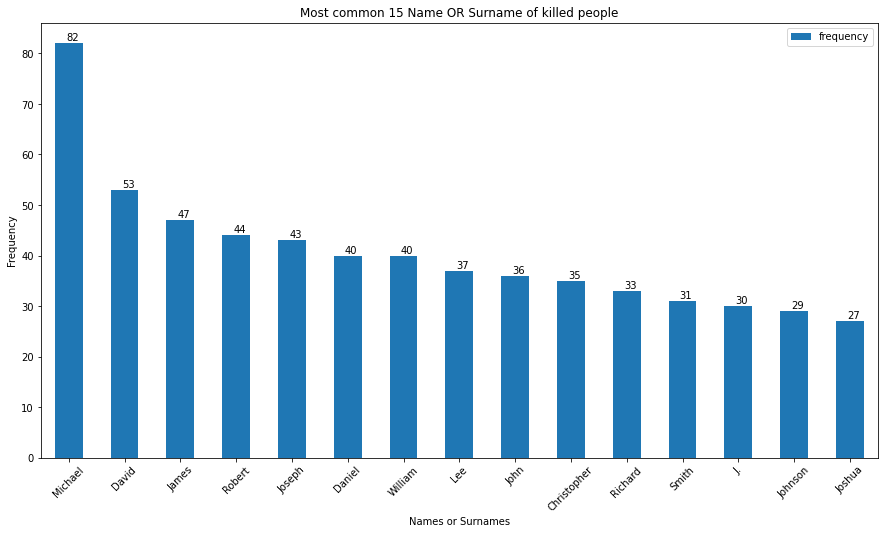

In [ ]:
# with pandas


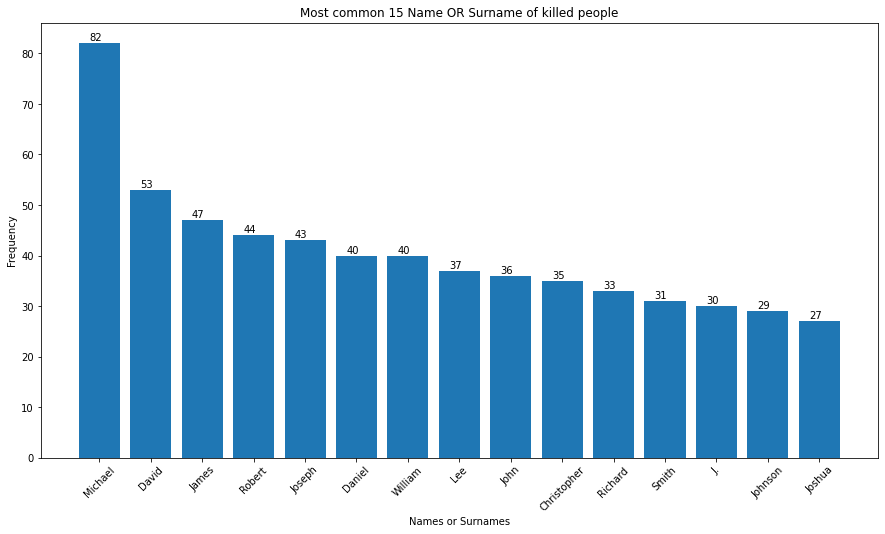

In [ ]:
# with matplotlib
